In [22]:
from backbone import Backbone
from datetime import datetime
import re
import json
import glob
import os
import pickle

In [3]:
def extractRating(text):
    pattern = '([0-9]+)/10' 
    p = re.compile(pattern,re.M | re.I)
    matches = p.findall(text)
    if len(matches) != 0:
        rating = matches[0] 
    else:
        rating = ''
    return rating

In [4]:
def get_IMDB_id(imdb_link):    
    #http://www.imdb.com/title/tt0970866
    pattern = '.*?/tt([0-9]*)/*$' 
    p = re.compile(pattern,re.M | re.I)
    matches = p.findall(imdb_link)
    if len(matches) > 0:
        return matches[0]
    else:
        return -1

In [5]:
def extractDataFromTweet(tweet):
    user = -1
    movie = -1
    rating = -1
    timestamp = -1
    try:
        #user
        user = tweet['user']['id']
        #imdb id = movie id
        url = tweet['entities']['urls'][0]['expanded_url']
        movie = get_IMDB_id(url)
        #rating 
        rating = extractRating(tweet['text'])
        #timestamp
        timestamp = tweet['created_at']
        the_time = datetime.strptime(timestamp.replace(' +0000',''), '%a %b %d %H:%M:%S %Y')
        timestamp = (the_time-datetime(1970,1,1)).total_seconds()
        timestamp = int(timestamp)
        line = str(user) + '::'  + str(movie) + '::' + str(rating) +  '::' + str(timestamp) 
        print (line)
    except:
        return user, movie, rating, timestamp    
    return user, movie, rating, timestamp
    
def extractDataset(tweets):
    dataset = list()
    for tweet in tweets:
        try:
            user, movie, rating, timestamp = extractDataFromTweet(tweet)
            if user == -1 or movie == -1 or rating == -1 or timestamp == -1:
                continue
            dataset.append((user, movie, rating, timestamp))
        except:
            continue
    return dataset
    
def writeDataset(dataset, filename):
    open(filename, 'a').write('\n'.join('%s,%s,%s,%s' % x for x in dataset))
#     lines = list()
#     for ((user, movie, rating, timestamp)) in dataset:
#         line = str(user) + '::'  + str(movie) + '::' + str(rating) +  '::' + str(timestamp) + '\n'
#         line = line.encode('UTF-8')
#         lines.append(line)
#     with open(filename, 'a') as outfile:
#         outfile.writelines(lines)
    
def writeTweets(tweets, filename):
    with open(filename, 'w') as outfile:
        json.dump(tweets, outfile)
#     line = json.dumps(tweets, ensure_ascii = False).encode('UTF-8')
#     with open(filename, 'w') as outfile:
#         outfile.writelines(line)
        
def get_since_id(path):
    since_id  = 0
    for infile in glob.glob( os.path.join(path, 'tweets_*.json') ):
        pattern = 'tweets_([0-9]*).json'
        p = re.compile(pattern,re.M | re.I)
        matches = p.findall(infile)
        id = int(matches[0])
        #keep maximum id
        since_id = max(id, since_id)
    return since_id

In [6]:
if __name__ == "__main__":        
    b = Backbone()

    datasetpath = 'C:/Users/Dell/Desktop/Data Management and database design/Project/Code for reference/Twitter-ratings-master/newdatasets/IMDb'
    since_id = get_since_id(datasetpath)

    tweets, new_since_id =  b.searchTweets('I rated #IMDB', since_id)
    dataset = extractDataset(tweets)
    writeDataset(dataset, datasetpath + '/ratings.csv')
    writeTweets(tweets,datasetpath + '/tweets_' + str(new_since_id) + '.json')
    

  Found 100 tweets.
  Found 100 tweets.
  Found 57 tweets.
  Found 0 tweets.
303384618::0274166::5::1522986004
783034098::0765429::10::1522985903
19001599::2704998::9::1522985427
4610553696::2531344::7::1522985343
1496558082::-1::8::1522984880
441707201::7629358::10::1522984680
206144706::6644200::8::1522984633
742887606652784644::6644200::10::1522983747
874726648058458114::2582802::9::1522983530
2841661915::1211837::7::1522983241
2210725957::2980516::9::1522982594
136863216::1267379::7::1522982351
2207092457::2283362::6::1522982346
21463821::6644200::8::1522982282
620953::6644200::10::1522981598
50933404::4555426::7::1522981381
50933404::1677720::7::1522981313
355343188::4924942::6::1522981117
2802237280::1590193::7::1522981098
146861274::5862312::5::1522980390
1182931890::6644200::9::1522980077
14238890::7167630::9::1522979917
2152758977::-1::9::1522979854
563403949::0811080::10::1522979841
17240500::6712390::7::1522979580
2958922748::5294550::6::1522978855
3153335852::1485796::8::15

In [7]:
#type(tweets)
tweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Apr 06 03:38:23 +0000 2018',
 'entities': {'hashtags': [{'indices': [40, 45], 'text': 'IMDb'}],
  'symbols': [],
  'urls': [{'display_url': 'imdb.com/title/tt0765429',
    'expanded_url': 'http://www.imdb.com/title/tt0765429',
    'indices': [47, 70],
    'url': 'https://t.co/UQJFhmt1LQ'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 982100175521906689,
 'id_str': '982100175521906689',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': 'I rated American Gangster (2007)

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [138]:
tweet_rating=pd.read_csv(r'''E:\Data Management and database design\Project\Code for reference\Twitter-ratings-master\newdatasets\IMDb\ratings.csv''')

In [139]:
tweet_rating.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,1.303533e+08,1307068,10.0,1522902075
1,3.487794e+08,7043176,8.0,1522901127
2,1.457927e+08,6470762,6.0,1522900426
3,1.104898e+08,6644200,10.0,1522899991
4,2.875989e+07,1584016,7.0,1522899766
5,3.646096e+08,2406566,5.0,1522899076
6,3.122073e+07,5133308,6.0,1522898034
7,4.610554e+09,6684714,8.0,1522898011
8,1.176473e+09,5580390,6.0,1522897970
9,6.958999e+07,5580390,7.0,1522896889


In [140]:
tweet_rating.sort_values(by='Tweet_movieID', inplace=True)
tweet_rating.reset_index(inplace=True, drop=True)

In [141]:
# convert ratings to int


In [142]:
tweet_rating.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,1.002560e+09,21749,5.0,1522727572
1,2.934228e+08,23940,8.0,1522484264
2,1.024538e+09,32762,7.0,1522675631
3,1.599453e+09,33563,10.0,1522601177
4,3.559590e+08,35446,10.0,1522970426
5,7.093991e+08,35446,10.0,1522498659
6,7.879309e+08,37793,5.0,1522266848
7,7.253810e+17,38650,10.0,1522869229
8,5.332382e+08,38650,10.0,1522111416
9,7.879309e+08,40068,6.0,1522445090


In [143]:
print(tweet_rating.dtypes)

Tweet_userID       float64
Tweet_movieID        int64
Tweet_rating       float64
Tweet_timestamp      int64
dtype: object


In [144]:
tweet_rating.Tweet_timestamp = pd.to_datetime(tweet_rating.Tweet_timestamp, infer_datetime_format=True)

In [145]:
tweet_rating.head(10)
tweet_rating.count()

Tweet_userID       3011
Tweet_movieID      3011
Tweet_rating       3004
Tweet_timestamp    3011
dtype: int64

In [146]:
user_list=tweet_rating.Tweet_userID.unique()
user_list.size

1467

In [147]:
#filter rows with rating 1 to 10
tweet_rating=tweet_rating.loc[tweet_rating['Tweet_rating'] < 11]


In [148]:
movie_list=tweet_rating.Tweet_rating.unique()
movie_list.size

11

In [149]:
tweet_rating.Tweet_timestamp = tweet_rating.Tweet_timestamp.dt.year

In [158]:
tweet_rating.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,1.002560e+09,21749,5.0,1970
1,2.934228e+08,23940,8.0,1970
2,1.024538e+09,32762,7.0,1970
3,1.599453e+09,33563,10.0,1970
4,3.559590e+08,35446,10.0,1970
5,7.093991e+08,35446,10.0,1970
6,7.879309e+08,37793,5.0,1970
7,7.253810e+17,38650,10.0,1970
8,5.332382e+08,38650,10.0,1970
9,7.879309e+08,40068,6.0,1970


In [159]:
print ("Number of tweet_rating Null values: ", max(tweet_rating.isnull().sum()))

Number of tweet_rating Null values:  0


In [160]:
tweet_rating.dropna(inplace=True)

In [161]:
print ("Number of tweet_rating Null values: ", max(tweet_rating.isnull().sum()))

Number of tweet_rating Null values:  0


In [164]:
#st = default_timer()
#dftmp = tweet_rating[['Tweet_userID','Tweet_rating']].groupby('Tweet_userID').mean()
#dftmp = tweet_rating[['Tweet_userID','Tweet_rating']].groupby('Tweet_userID').mean()


dftmp = tweet_rating[['Tweet_rating','Tweet_userID']].groupby('Tweet_rating').count()
dftmp

,Tweet_userID
Tweet_rating,
0.0,2
1.0,35
2.0,23
3.0,42
4.0,68
5.0,233
6.0,324
7.0,637
8.0,745


Ratings per user

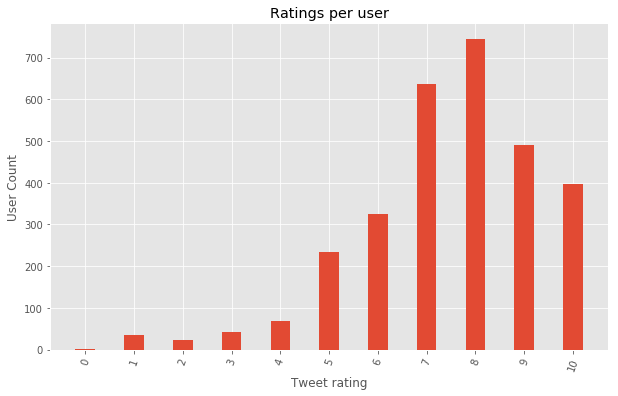

In [171]:
user_rating_count=dict(tweet_rating['Tweet_userID'].groupby(tweet_rating['Tweet_rating']).count())

x = np.array(list(user_rating_count.keys()))
y = np.array(list(user_rating_count.values()))

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Tweet rating')
ax.set_ylabel('User Count')

plt.xticks(rotation=70)
plt.xticks(x)
#ax.xaxis_date()
ax.bar(x, y, width=0.4)
plt.title('Ratings per user')


plt.show()